### Tqdm

In [1]:
from tqdm import tqdm

In [2]:
tqdm()

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [3]:
# 処理の長いfor文にてtimeモジュールで処理時間を調べてみる

import time
sum_ = 0
before = time.time()
for i in range(int(1e7)):
    sum_ += 1
print(sum_)
after =time.time()
print('it took {}'.format(after - before))

10000000
it took 0.917393684387207


In [4]:
# tqdmを入れてみる

import time
sum_ = 0
before = time.time()
for i in tqdm(range(int(1e7))):
    sum_ += 1
print(sum_)
after =time.time()
print('it took {}'.format(after - before))


100%|██████████| 10000000/10000000 [00:03<00:00, 2754930.50it/s][A

10000000
it took 3.6350667476654053


In [5]:
# tqdmの表示を短くしてみる

import time
sum_ = 0
before = time.time()
for i in tqdm(range(int(1e7)), position=0):
    sum_ += 1
print(sum_)
after =time.time()
print('it took {}'.format(after - before))

100%|██████████| 10000000/10000000 [00:03<00:00, 2805525.62it/s]

10000000
it took 3.566970109939575


In [6]:
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
from pathlib import Path

#### DataFrameの作成

- **columns: path_im, filename, path_msk**


1. path_im -> 'public-covid-data/rp_im/5.nii.gz'

2. path_msk -> 'public-covid-data/rp_msk/5.nii.gz'

3. filename -> '5.nii.gz'

#### 1. path_im -> 'public-covid-data/rp_im/5.nii.gz'の作成

In [7]:
p = Path('public-covid-data/')
p

PosixPath('public-covid-data')

In [8]:
list(p.iterdir())

[PosixPath('public-covid-data/rp_im'), PosixPath('public-covid-data/rp_msk')]

In [9]:
rm public-covid-data/.DS_Store

rm: cannot remove 'public-covid-data/.DS_Store': No such file or directory


In [10]:
sub_p = list(p.iterdir())[0]
print(sub_p)
folder = list(sub_p.iterdir())[1:10]# [0]は.DS_Store
folder

public-covid-data/rp_im


[PosixPath('public-covid-data/rp_im/2.nii.gz'),
 PosixPath('public-covid-data/rp_im/3.nii.gz'),
 PosixPath('public-covid-data/rp_im/4.nii.gz'),
 PosixPath('public-covid-data/rp_im/5.nii.gz'),
 PosixPath('public-covid-data/rp_im/6.nii.gz'),
 PosixPath('public-covid-data/rp_im/7.nii.gz'),
 PosixPath('public-covid-data/rp_im/8.nii.gz'),
 PosixPath('public-covid-data/rp_im/9.nii.gz')]

In [11]:
# 文字列のみを取得

folder[1].as_posix()

'public-covid-data/rp_im/3.nii.gz'

In [12]:
# 文字列のみを取得、その２

str(folder[1])

'public-covid-data/rp_im/3.nii.gz'

#### 2. path_msk -> 'public-covid-data/rp_msk/5.nii.gz'

In [13]:
sub_q = list(p.iterdir())[1]
print(sub_q)
folder_ = list(sub_q.iterdir())# [0]は.DS_Store
folder_

public-covid-data/rp_msk


[PosixPath('public-covid-data/rp_msk/1.nii.gz'),
 PosixPath('public-covid-data/rp_msk/2.nii.gz'),
 PosixPath('public-covid-data/rp_msk/3.nii.gz'),
 PosixPath('public-covid-data/rp_msk/4.nii.gz'),
 PosixPath('public-covid-data/rp_msk/5.nii.gz'),
 PosixPath('public-covid-data/rp_msk/6.nii.gz'),
 PosixPath('public-covid-data/rp_msk/7.nii.gz'),
 PosixPath('public-covid-data/rp_msk/8.nii.gz'),
 PosixPath('public-covid-data/rp_msk/9.nii.gz')]

In [14]:
folder_[1].as_posix()

'public-covid-data/rp_msk/2.nii.gz'

#### 3. filename -> '5.nii.gz'

In [15]:
# filenameを取得

os.path.split(folder[1].as_posix())[1]

'3.nii.gz'

In [16]:
# for文でpath_imとfilenameを生成する並列処理を行う
path_im_list = []
filename_list = []

for i in list(sub_p.iterdir())[1:10]:
    path_im_list.append(i.as_posix())
#    str_i = i.as_posix()
#    print(os.path.split(str_i)[1])
    filename_list.append(os.path.split(i.as_posix())[1])

In [17]:
path_im_list

['public-covid-data/rp_im/2.nii.gz',
 'public-covid-data/rp_im/3.nii.gz',
 'public-covid-data/rp_im/4.nii.gz',
 'public-covid-data/rp_im/5.nii.gz',
 'public-covid-data/rp_im/6.nii.gz',
 'public-covid-data/rp_im/7.nii.gz',
 'public-covid-data/rp_im/8.nii.gz',
 'public-covid-data/rp_im/9.nii.gz']

In [18]:
filename_list

['2.nii.gz',
 '3.nii.gz',
 '4.nii.gz',
 '5.nii.gz',
 '6.nii.gz',
 '7.nii.gz',
 '8.nii.gz',
 '9.nii.gz']

In [19]:
# for文でpath_mskを生成する並列処理を行う

path_msk_list = []

for j in (sub_q.iterdir()):
    path_msk_list.append(j.as_posix())
    
path_msk_list

['public-covid-data/rp_msk/1.nii.gz',
 'public-covid-data/rp_msk/2.nii.gz',
 'public-covid-data/rp_msk/3.nii.gz',
 'public-covid-data/rp_msk/4.nii.gz',
 'public-covid-data/rp_msk/5.nii.gz',
 'public-covid-data/rp_msk/6.nii.gz',
 'public-covid-data/rp_msk/7.nii.gz',
 'public-covid-data/rp_msk/8.nii.gz',
 'public-covid-data/rp_msk/9.nii.gz']

In [20]:
# path_imのfor文をリスト内包記で
path_im_list_ = []

[path_im_list_.append(i.as_posix()) for i in list(sub_p.iterdir())]

path_im_list_

['public-covid-data/rp_im/1.nii.gz',
 'public-covid-data/rp_im/2.nii.gz',
 'public-covid-data/rp_im/3.nii.gz',
 'public-covid-data/rp_im/4.nii.gz',
 'public-covid-data/rp_im/5.nii.gz',
 'public-covid-data/rp_im/6.nii.gz',
 'public-covid-data/rp_im/7.nii.gz',
 'public-covid-data/rp_im/8.nii.gz',
 'public-covid-data/rp_im/9.nii.gz']

In [21]:
# filenameのfor文をリスト内包記で

filename_list_ = []

[filename_list_.append(os.path.split(i.as_posix())[1]) for i in list(sub_p.iterdir())]

filename_list_

['1.nii.gz',
 '2.nii.gz',
 '3.nii.gz',
 '4.nii.gz',
 '5.nii.gz',
 '6.nii.gz',
 '7.nii.gz',
 '8.nii.gz',
 '9.nii.gz']

In [22]:
# path_mskのfor文をリスト内包記で
path_msk_list_ = []

[path_msk_list_.append(j.as_posix()) for j in list(sub_q.iterdir())]

path_msk_list_

['public-covid-data/rp_msk/1.nii.gz',
 'public-covid-data/rp_msk/2.nii.gz',
 'public-covid-data/rp_msk/3.nii.gz',
 'public-covid-data/rp_msk/4.nii.gz',
 'public-covid-data/rp_msk/5.nii.gz',
 'public-covid-data/rp_msk/6.nii.gz',
 'public-covid-data/rp_msk/7.nii.gz',
 'public-covid-data/rp_msk/8.nii.gz',
 'public-covid-data/rp_msk/9.nii.gz']

In [23]:
df1 = pd.DataFrame({'path_im':path_im_list_, 
                   'filename':filename_list_, 
                   'path_msk':path_msk_list_})

In [24]:
df1

,path_im,filename,path_msk
0,public-covid-data/rp_im/1.nii.gz,1.nii.gz,public-covid-data/rp_msk/1.nii.gz
1,public-covid-data/rp_im/2.nii.gz,2.nii.gz,public-covid-data/rp_msk/2.nii.gz
2,public-covid-data/rp_im/3.nii.gz,3.nii.gz,public-covid-data/rp_msk/3.nii.gz
3,public-covid-data/rp_im/4.nii.gz,4.nii.gz,public-covid-data/rp_msk/4.nii.gz
4,public-covid-data/rp_im/5.nii.gz,5.nii.gz,public-covid-data/rp_msk/5.nii.gz
5,public-covid-data/rp_im/6.nii.gz,6.nii.gz,public-covid-data/rp_msk/6.nii.gz
6,public-covid-data/rp_im/7.nii.gz,7.nii.gz,public-covid-data/rp_msk/7.nii.gz
7,public-covid-data/rp_im/8.nii.gz,8.nii.gz,public-covid-data/rp_msk/8.nii.gz
8,public-covid-data/rp_im/9.nii.gz,9.nii.gz,public-covid-data/rp_msk/9.nii.gz


### 模範解答

In [25]:
p = Path('public-covid-data')
list(p.iterdir())

[PosixPath('public-covid-data/rp_im'), PosixPath('public-covid-data/rp_msk')]

---

#### path_listのidea

In [26]:
directory = list(p.iterdir())[0]
list(directory.iterdir())

[PosixPath('public-covid-data/rp_im/1.nii.gz'),
 PosixPath('public-covid-data/rp_im/2.nii.gz'),
 PosixPath('public-covid-data/rp_im/3.nii.gz'),
 PosixPath('public-covid-data/rp_im/4.nii.gz'),
 PosixPath('public-covid-data/rp_im/5.nii.gz'),
 PosixPath('public-covid-data/rp_im/6.nii.gz'),
 PosixPath('public-covid-data/rp_im/7.nii.gz'),
 PosixPath('public-covid-data/rp_im/8.nii.gz'),
 PosixPath('public-covid-data/rp_im/9.nii.gz')]

In [27]:
subp = list(directory.iterdir())[0]
subp.as_posix()

'public-covid-data/rp_im/1.nii.gz'

---

#### file_name_listのidea

In [28]:
os.path.split(subp)

('public-covid-data/rp_im', '1.nii.gz')

In [29]:
os.path.split(subp)[1]

'1.nii.gz'

---

In [30]:
path_list = []
flie_name_list = []
df_list = []

for directory in p.iterdir():
    path_list = [p.as_posix() for p in list(directory.iterdir())]
    flie_name_list = [os.path.split(p)[1] for p in list(directory.iterdir())]
    df_list.append(pd.DataFrame({'path':path_list, 'filename':flie_name_list}))

In [31]:
path_list

['public-covid-data/rp_msk/1.nii.gz',
 'public-covid-data/rp_msk/2.nii.gz',
 'public-covid-data/rp_msk/3.nii.gz',
 'public-covid-data/rp_msk/4.nii.gz',
 'public-covid-data/rp_msk/5.nii.gz',
 'public-covid-data/rp_msk/6.nii.gz',
 'public-covid-data/rp_msk/7.nii.gz',
 'public-covid-data/rp_msk/8.nii.gz',
 'public-covid-data/rp_msk/9.nii.gz']

In [32]:
flie_name_list

['1.nii.gz',
 '2.nii.gz',
 '3.nii.gz',
 '4.nii.gz',
 '5.nii.gz',
 '6.nii.gz',
 '7.nii.gz',
 '8.nii.gz',
 '9.nii.gz']

In [33]:
df_list

[                               path  filename
 0  public-covid-data/rp_im/1.nii.gz  1.nii.gz
 1  public-covid-data/rp_im/2.nii.gz  2.nii.gz
 2  public-covid-data/rp_im/3.nii.gz  3.nii.gz
 3  public-covid-data/rp_im/4.nii.gz  4.nii.gz
 4  public-covid-data/rp_im/5.nii.gz  5.nii.gz
 5  public-covid-data/rp_im/6.nii.gz  6.nii.gz
 6  public-covid-data/rp_im/7.nii.gz  7.nii.gz
 7  public-covid-data/rp_im/8.nii.gz  8.nii.gz
 8  public-covid-data/rp_im/9.nii.gz  9.nii.gz,
                                 path  filename
 0  public-covid-data/rp_msk/1.nii.gz  1.nii.gz
 1  public-covid-data/rp_msk/2.nii.gz  2.nii.gz
 2  public-covid-data/rp_msk/3.nii.gz  3.nii.gz
 3  public-covid-data/rp_msk/4.nii.gz  4.nii.gz
 4  public-covid-data/rp_msk/5.nii.gz  5.nii.gz
 5  public-covid-data/rp_msk/6.nii.gz  6.nii.gz
 6  public-covid-data/rp_msk/7.nii.gz  7.nii.gz
 7  public-covid-data/rp_msk/8.nii.gz  8.nii.gz
 8  public-covid-data/rp_msk/9.nii.gz  9.nii.gz]

In [34]:
df_list[0]

,path,filename
0,public-covid-data/rp_im/1.nii.gz,1.nii.gz
1,public-covid-data/rp_im/2.nii.gz,2.nii.gz
2,public-covid-data/rp_im/3.nii.gz,3.nii.gz
3,public-covid-data/rp_im/4.nii.gz,4.nii.gz
4,public-covid-data/rp_im/5.nii.gz,5.nii.gz
5,public-covid-data/rp_im/6.nii.gz,6.nii.gz
6,public-covid-data/rp_im/7.nii.gz,7.nii.gz
7,public-covid-data/rp_im/8.nii.gz,8.nii.gz
8,public-covid-data/rp_im/9.nii.gz,9.nii.gz


In [35]:
df_list[1]

,path,filename
0,public-covid-data/rp_msk/1.nii.gz,1.nii.gz
1,public-covid-data/rp_msk/2.nii.gz,2.nii.gz
2,public-covid-data/rp_msk/3.nii.gz,3.nii.gz
3,public-covid-data/rp_msk/4.nii.gz,4.nii.gz
4,public-covid-data/rp_msk/5.nii.gz,5.nii.gz
5,public-covid-data/rp_msk/6.nii.gz,6.nii.gz
6,public-covid-data/rp_msk/7.nii.gz,7.nii.gz
7,public-covid-data/rp_msk/8.nii.gz,8.nii.gz
8,public-covid-data/rp_msk/9.nii.gz,9.nii.gz


In [36]:
# df_listの[0]と[1]をmergeする

df = df_list[0].merge(df_list[1], 
                      on='filename', 
                      suffixes=('_im', '_msk'))
df

,path_im,filename,path_msk
0,public-covid-data/rp_im/1.nii.gz,1.nii.gz,public-covid-data/rp_msk/1.nii.gz
1,public-covid-data/rp_im/2.nii.gz,2.nii.gz,public-covid-data/rp_msk/2.nii.gz
2,public-covid-data/rp_im/3.nii.gz,3.nii.gz,public-covid-data/rp_msk/3.nii.gz
3,public-covid-data/rp_im/4.nii.gz,4.nii.gz,public-covid-data/rp_msk/4.nii.gz
4,public-covid-data/rp_im/5.nii.gz,5.nii.gz,public-covid-data/rp_msk/5.nii.gz
5,public-covid-data/rp_im/6.nii.gz,6.nii.gz,public-covid-data/rp_msk/6.nii.gz
6,public-covid-data/rp_im/7.nii.gz,7.nii.gz,public-covid-data/rp_msk/7.nii.gz
7,public-covid-data/rp_im/8.nii.gz,8.nii.gz,public-covid-data/rp_msk/8.nii.gz
8,public-covid-data/rp_im/9.nii.gz,9.nii.gz,public-covid-data/rp_msk/9.nii.gz


In [37]:
for idx, row in df.iterrows():
    print('image path for {} is here {}'.format(row[0], row[1]))
    print('image path for {} is here {}'.format(row[2], row[1]))
    print('\n')

image path for public-covid-data/rp_im/1.nii.gz is here 1.nii.gz
image path for public-covid-data/rp_msk/1.nii.gz is here 1.nii.gz


image path for public-covid-data/rp_im/2.nii.gz is here 2.nii.gz
image path for public-covid-data/rp_msk/2.nii.gz is here 2.nii.gz


image path for public-covid-data/rp_im/3.nii.gz is here 3.nii.gz
image path for public-covid-data/rp_msk/3.nii.gz is here 3.nii.gz


image path for public-covid-data/rp_im/4.nii.gz is here 4.nii.gz
image path for public-covid-data/rp_msk/4.nii.gz is here 4.nii.gz


image path for public-covid-data/rp_im/5.nii.gz is here 5.nii.gz
image path for public-covid-data/rp_msk/5.nii.gz is here 5.nii.gz


image path for public-covid-data/rp_im/6.nii.gz is here 6.nii.gz
image path for public-covid-data/rp_msk/6.nii.gz is here 6.nii.gz


image path for public-covid-data/rp_im/7.nii.gz is here 7.nii.gz
image path for public-covid-data/rp_msk/7.nii.gz is here 7.nii.gz


image path for public-covid-data/rp_im/8.nii.gz is here 8.nii.gz
imag

In [38]:
# tqdmを使う
# dataframeではtqdmの処理のBarがでないので、total=len(**)で長さを入れる

for idx, row in tqdm(df.iterrows(), total=len(df)):
    print('image path for {} is here {}'.format(row[0], row[1]))
    print('image path for {} is here {}'.format(row[2], row[1]))
    print('\n')


100%|██████████| 9/9 [00:00<00:00, 1356.36it/s]

image path for public-covid-data/rp_im/1.nii.gz is here 1.nii.gz
image path for public-covid-data/rp_msk/1.nii.gz is here 1.nii.gz


image path for public-covid-data/rp_im/2.nii.gz is here 2.nii.gz
image path for public-covid-data/rp_msk/2.nii.gz is here 2.nii.gz


image path for public-covid-data/rp_im/3.nii.gz is here 3.nii.gz
image path for public-covid-data/rp_msk/3.nii.gz is here 3.nii.gz


image path for public-covid-data/rp_im/4.nii.gz is here 4.nii.gz
image path for public-covid-data/rp_msk/4.nii.gz is here 4.nii.gz


image path for public-covid-data/rp_im/5.nii.gz is here 5.nii.gz
image path for public-covid-data/rp_msk/5.nii.gz is here 5.nii.gz


image path for public-covid-data/rp_im/6.nii.gz is here 6.nii.gz
image path for public-covid-data/rp_msk/6.nii.gz is here 6.nii.gz


image path for public-covid-data/rp_im/7.nii.gz is here 7.nii.gz
image path for public-covid-data/rp_msk/7.nii.gz is here 7.nii.gz


image path for public-covid-data/rp_im/8.nii.gz is here 8.nii.gz
imag

### Nibabel

NIfTI(Neuroimaging Informatics Technology Initiative)をPythonで扱う。

NIfTIは主に脳のMRI画像のデータ形式に使われている。

In [39]:
import nibabel as nib

### nib.load()

In [40]:
path = df['path_im'].iloc[0]
im_nifti = nib.load(path)
im_nifti

In [41]:
# numpy用の画像を引っ張ってくる

data = im_nifti.get_fdata()
data

array([[[-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        [-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        [-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        ...,
        [-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        [-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        [-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086]],

       [[-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        [-1414.76538086, -1414.76538086, -1414.76538086, ...,
         -1414.76538086, -1414.76538086, -1414.76538086],
        [-1414.76538086, 

In [42]:
data.shape

(630, 630, 45)

630 * 630のデータが45枚入っている

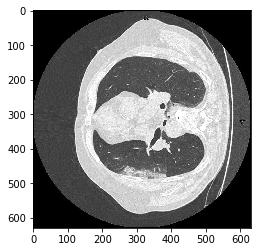

In [43]:
plt.imshow(data[:, :, 20], cmap='gray')

CT画像は画像右側の半円形の部分が患者がのる台座部分になるので、そこを下に表示させる必要がある。

その為transposeを用いて転置をしてあげる必要がある。

今回はCT画像で(width, height, z)のようになっていたので、
`[:, :, 20]`でスライスすると(w, h)となり、横になってしまうのを、Transposeによって(z, w, h)として`[0, :, :]`のようにスライスして(h, w)とした。

Transposeはshapeの順序を入れ替える。
例えば、shapeが(1, 2, 3, 4)の場合、Transpose後は(4, 3, 2, 1)のようになる。

(45, 630, 630)


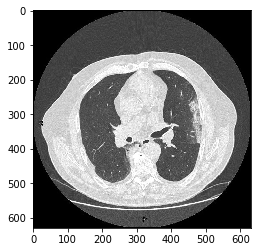

In [44]:
data_t = np.transpose(data)
plt.imshow(data_t[20, :, :], cmap='gray')
print(data_t.shape)

In [45]:
path_im = df['path_im'].iloc[0]
path_msk = df['path_msk'].iloc[0]

In [46]:
# 上記の処理を関数化する

def load_nifti(path):
    im_nifti = nib.load(path)
    data = im_nifti.get_fdata()
    data = np.transpose(data)
    return data

In [47]:
data_im = load_nifti(path_im)
data_msk = load_nifti(path_msk)

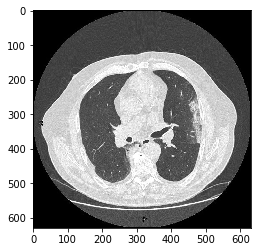

In [48]:
plt.imshow(data_im[20, :, :], cmap='gray')

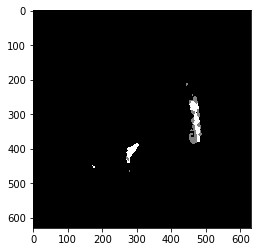

In [49]:
plt.imshow(data_msk[20, :, :], cmap='gray')

In [50]:
# data_mskの中身をみる
data_msk[20]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
# 数値の組成を見てみる
# 0:background, 1:ground-glass(GGO:すりガラス影), 2:Consolidation, 
# 3:plueral effusion(胸水)

np.unique(data_msk[20])

array([0., 1., 2.])

コンソリデーションとは、背景の血管や気管支壁が不明瞭化する程度の肺実質の吸収値の均等な上昇と定義されている。

明らかな結節や腫瘍、胸水などの表現には用いず、濃厚な均等高吸収を呈する肺野内の広がりを示す画像所見に用いる。

肺でのコンソリデーションの語源は、元々は、画像検査が出現するずっと以前、剖検病理において、肺炎により炎症細胞浸潤をおこした部位が正常含気肺に比べて、触診上硬くなっている状態を”consolidation”と表現したのが言葉の由来。

In [52]:
# 各データにCTのスライス画像が何枚入っているかをみる
# slice_numという新規で作ったcolumnsにしまう
# まずNanのデータを入れた空のcolumnsを用意

df['slice_num'] = np.nan
df

,path_im,filename,path_msk,slice_num
0,public-covid-data/rp_im/1.nii.gz,1.nii.gz,public-covid-data/rp_msk/1.nii.gz,NaN
1,public-covid-data/rp_im/2.nii.gz,2.nii.gz,public-covid-data/rp_msk/2.nii.gz,NaN
2,public-covid-data/rp_im/3.nii.gz,3.nii.gz,public-covid-data/rp_msk/3.nii.gz,NaN
3,public-covid-data/rp_im/4.nii.gz,4.nii.gz,public-covid-data/rp_msk/4.nii.gz,NaN
4,public-covid-data/rp_im/5.nii.gz,5.nii.gz,public-covid-data/rp_msk/5.nii.gz,NaN
5,public-covid-data/rp_im/6.nii.gz,6.nii.gz,public-covid-data/rp_msk/6.nii.gz,NaN
6,public-covid-data/rp_im/7.nii.gz,7.nii.gz,public-covid-data/rp_msk/7.nii.gz,NaN
7,public-covid-data/rp_im/8.nii.gz,8.nii.gz,public-covid-data/rp_msk/8.nii.gz,NaN
8,public-covid-data/rp_im/9.nii.gz,9.nii.gz,public-covid-data/rp_msk/9.nii.gz,NaN


In [53]:
for idx, row in tqdm(df.iterrows(), total=len(df)):
    print(row)# 各ファイルのパスを取ってくる
    print('\n')
    data = load_nifti(row['path_im'])# path-imをload_nifti関数に入れる
    print(data.shape)# dataには転置されたCT画像が入ってくる（num, width, height）
    print('\n')
    slice_num = data.shape[0]# 
    df.loc[idx, 'slice_num'] = slice_num# idxとcolumnsの両方で指定
    print(slice_num)


  0%|          | 0/9 [00:00<?, ?it/s]

path_im       public-covid-data/rp_im/1.nii.gz
filename                              1.nii.gz
path_msk     public-covid-data/rp_msk/1.nii.gz
slice_num                                  NaN
Name: 0, dtype: object





 11%|█         | 1/9 [00:00<00:02,  2.98it/s]

(45, 630, 630)


45
path_im       public-covid-data/rp_im/2.nii.gz
filename                              2.nii.gz
path_msk     public-covid-data/rp_msk/2.nii.gz
slice_num                                  NaN
Name: 1, dtype: object





 22%|██▏       | 2/9 [00:00<00:02,  3.01it/s]

(39, 630, 630)


39
path_im       public-covid-data/rp_im/3.nii.gz
filename                              3.nii.gz
path_msk     public-covid-data/rp_msk/3.nii.gz
slice_num                                  NaN
Name: 2, dtype: object





 33%|███▎      | 3/9 [00:04<00:08,  1.45s/it]

(418, 630, 630)


418
path_im       public-covid-data/rp_im/4.nii.gz
filename                              4.nii.gz
path_msk     public-covid-data/rp_msk/4.nii.gz
slice_num                                  NaN
Name: 3, dtype: object





 44%|████▍     | 4/9 [00:05<00:05,  1.12s/it]

(39, 630, 630)


39
path_im       public-covid-data/rp_im/5.nii.gz
filename                              5.nii.gz
path_msk     public-covid-data/rp_msk/5.nii.gz
slice_num                                  NaN
Name: 4, dtype: object





 56%|█████▌    | 5/9 [00:05<00:03,  1.06it/s]

(66, 630, 630)


66
path_im       public-covid-data/rp_im/6.nii.gz
filename                              6.nii.gz
path_msk     public-covid-data/rp_msk/6.nii.gz
slice_num                                  NaN
Name: 5, dtype: object





 67%|██████▋   | 6/9 [00:05<00:02,  1.32it/s]

(42, 630, 630)


42
path_im       public-covid-data/rp_im/7.nii.gz
filename                              7.nii.gz
path_msk     public-covid-data/rp_msk/7.nii.gz
slice_num                                  NaN
Name: 6, dtype: object





 78%|███████▊  | 7/9 [00:06<00:01,  1.60it/s]

(42, 630, 630)


42
path_im       public-covid-data/rp_im/8.nii.gz
filename                              8.nii.gz
path_msk     public-covid-data/rp_msk/8.nii.gz
slice_num                                  NaN
Name: 7, dtype: object





 89%|████████▉ | 8/9 [00:06<00:00,  1.90it/s]

(45, 630, 630)


45
path_im       public-covid-data/rp_im/9.nii.gz
filename                              9.nii.gz
path_msk     public-covid-data/rp_msk/9.nii.gz
slice_num                                  NaN
Name: 8, dtype: object





100%|██████████| 9/9 [00:07<00:00,  1.24it/s]

(93, 630, 630)


93


In [54]:
df

,path_im,filename,path_msk,slice_num
0,public-covid-data/rp_im/1.nii.gz,1.nii.gz,public-covid-data/rp_msk/1.nii.gz,45.0
1,public-covid-data/rp_im/2.nii.gz,2.nii.gz,public-covid-data/rp_msk/2.nii.gz,39.0
2,public-covid-data/rp_im/3.nii.gz,3.nii.gz,public-covid-data/rp_msk/3.nii.gz,418.0
3,public-covid-data/rp_im/4.nii.gz,4.nii.gz,public-covid-data/rp_msk/4.nii.gz,39.0
4,public-covid-data/rp_im/5.nii.gz,5.nii.gz,public-covid-data/rp_msk/5.nii.gz,66.0
5,public-covid-data/rp_im/6.nii.gz,6.nii.gz,public-covid-data/rp_msk/6.nii.gz,42.0
6,public-covid-data/rp_im/7.nii.gz,7.nii.gz,public-covid-data/rp_msk/7.nii.gz,42.0
7,public-covid-data/rp_im/8.nii.gz,8.nii.gz,public-covid-data/rp_msk/8.nii.gz,45.0
8,public-covid-data/rp_im/9.nii.gz,9.nii.gz,public-covid-data/rp_msk/9.nii.gz,93.0


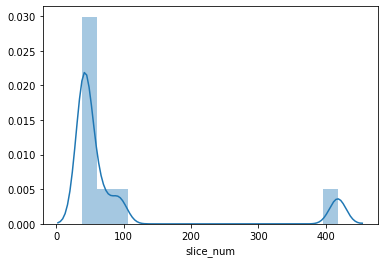

In [55]:
# 各データの分布を見てみる

sns.distplot(df['slice_num'])

### Multiprocessing

In [56]:
from multiprocessing import Pool, cpu_count
import time

### map(func, *iterables)

1個目の引数に入れた関数を、2個目の引数に入ったイテレーターに適応する。

返り値はイテレーターで返ってくる。

In [57]:
def square(n):
    return n ** 2

params = [1, 2, 3, 4]
map(square, params)

In [58]:
list(map(square, params))

[1, 4, 9, 16]

In [59]:
i = map(square, params)

In [60]:
#イテレーターはnext()に入れると、次々に連続した値を返してくれる。
next(i)

1

In [61]:
# pythonではリスト内包表記があるのであまり使われない

[square(p) for p in params]

[1, 4, 9, 16]

### Pool.map()とPool.imap()

In [62]:
# 使用できるcpuの物理コア数を確認してみる

cpu_count()

8

In [63]:
# time.sleep(n)でn秒間何もしない関数を作る
# returnにして欲しい処理を記載
# sec秒後にreturnの処理を行う関数を作成

def wait_sec(sec):
    time.sleep(sec)
    return sec ** 2

In [64]:
# 2秒後に2**2の処理がされて4が出力される

wait_sec(2)

4

In [65]:
# pythonのmap関数は一つの物理コアCPUに演算をさせる

before = time.time()
results = list(map(wait_sec, [1, 5, 3]))
after = time.time()
print(results)
print('it tooks {}'.format(after - before))

[1, 25, 9]
it tooks 9.017221689224243


In [66]:
# コア数を指定して処理を行う
# コア数を指定

p = Pool(processes=cpu_count()-1)
p

In [67]:
# pool.mapは複数のCPUに並列処理をさせる
# この場合だと[1, 5, 3]の３つの数が、それぞれのCPUで演算処理を受けている
# resultsのリストには処理の早い順に、1**2, 3**2, が入って、最後に5**2が入る
# 最後の演算が終わった時間が今回の演算速度となる為、計算速度は5秒となっている

before = time.time()
results = p.map(wait_sec, [1, 5, 3])
after = time.time()
print(results)
print('it tooks {}'.format(after - before))

[1, 25, 9]
it tooks 5.013274669647217


In [69]:
# p.imapはイテレーターを返してくれる
# for文に入れて処理を確認してみる
# イテレーターの順に演算処理がされるので、1**2→5**2→3**2の順で処理が行われる

before = time.time()
for i in p.imap(wait_sec, [1, 5, 3]):
    print('{}, Each time tooks {}sec'.format(i, time.time() - before))
after = time.time()
print(results)
print('Total time took {} sec'.format(after - before))

1, Each time tooks 1.0034470558166504sec
25, Each time tooks 5.008343458175659sec
9, Each time tooks 5.008660554885864sec
[1, 25, 9]
Total time took 5.010242462158203


In [71]:
# 本来のp.imapは以下のような形で書く
# イテレーターを返してくれるので、tqdmに入れることができる

before = time.time()
results = list(tqdm(p.imap(wait_sec, [1, 5, 3]), total=3))
after = time.time()
print(results)
print('it tooks {} sec'.format(after - before))


100%|██████████| 3/3 [00:05<00:00,  1.67s/it]

[1, 25, 9]
it tooks 5.018226861953735 sec


In [73]:
# p.imap_unorderedにすると処理速度の早い順に処理してくれる

before = time.time()
for i in p.imap_unordered(wait_sec, [1, 5, 3]):
    print('{}, Each time tooks {}sec'.format(i, time.time() - before))
after = time.time()
print(results)
print('Total time took {} sec'.format(after - before))

1, Each time tooks 1.006356954574585sec
9, Each time tooks 3.004133462905884sec
25, Each time tooks 5.007692098617554sec
[1, 9, 25]
Total time took 5.008322715759277 sec


In [72]:
# tqdmに入れると少し処理が遅くなる

before = time.time()
results = list(tqdm(p.imap_unordered(wait_sec, [1, 5, 3]), total=3))
after = time.time()
print(results)
print('it tooks {} sec'.format(after - before))


100%|██████████| 3/3 [00:05<00:00,  1.67s/it]

[1, 9, 25]
it tooks 5.016034126281738 sec


In [76]:
# p.imapは単独の引数しか入れられない
# もし複数のイテレーターでの計算を行う場合はwrapper（ラッパー）関数を使ってあげると良い
# zip関数を用いると、異なる2つのリストのインデックスが同じもの同士をタプルにして返す

def multiply(a, b):
    return a * b

def wrap_multiply(args):
    return multiply(*args)

param1 = [1, 2, 3, 4]
param2 = [10, 30, 70, 20]
job_args = list(zip(param1, param2))
print(job_args)

p = Pool(processes=cpu_count()-1)

results = list(p.imap(wrap_multiply, job_args))
print(results)

# pというインスタンスを閉じて並列処理を終了してあげる
p.close()
p.join

[(1, 10), (2, 30), (3, 70), (4, 20)]
[10, 60, 210, 80]


<bound method Pool.join of <multiprocessing.pool.Pool object at 0x7fa9dd2bf890>>

### Pythonスクリプトを別ファイルに保存してJupyterで読み込む

In [80]:
# やり方その１

from util import multiply

In [82]:
multiply(3, 2)

6

In [83]:
# やり方その2

import util

In [84]:
util.multiply(3, 2)

6

In [87]:
# 他のファイルの変更内容を常に反映させる

%load_ext autoreload
# 1:反映しない, 2:今だけ反映する, 3:更新の度に反映する
%autoreload 2

util.multiply2(3, 2)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3×2=6!!!


6